In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ad_click_dataset.csv')
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [3]:
df.shape

(10000, 9)

In [4]:
df.describe()

,id,age,click
count,10000.000000,5234.000000,10000.000000
mean,5060.211400,40.197363,0.650000
std,2861.758265,13.126420,0.476993
min,5.000000,18.000000,0.000000
25%,2529.000000,29.000000,0.000000
50%,5218.000000,39.500000,1.000000
75%,7466.000000,52.000000,1.000000
max,10000.000000,64.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


In [6]:
import plotly.express as px
def plot_pie_chart(df, column_name):
    value_counts = df[column_name].value_counts(dropna=False)
    value_counts = value_counts.reset_index()
    value_counts.columns = [column_name, 'count']
    
    fig = px.pie(value_counts, names=column_name, values='count', 
                 title=f'{column_name} Distribution (Including Unknown)',
                 color_discrete_sequence=px.colors.qualitative.T10,
                 hole=0.4)
    
    fig.update_traces(textinfo='percent+label')

    fig.update_layout(title_x=0.5)

    fig.show()

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('full_name', errors='ignore')
for col in categorical_columns:
    plot_pie_chart(df, col)

In [7]:
df_user_type = df.copy()
user_counts = df_user_type['full_name'].value_counts()

df_user_type['user_type'] = df_user_type['full_name'].apply(lambda x: 'First Time Users' if user_counts[x] == 1 else 'Recurring Users')
recurring_users = df_user_type[df_user_type.duplicated(subset=['full_name'], keep=False)]
first_time_users = df_user_type.drop_duplicates(subset=['full_name'], keep=False)

In [8]:
recurring_users.describe(include='all')

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click,user_type
count,6500.000000,6500,3351.000000,3449,5190,5218,3336,5216,6500.0,6500
unique,NaN,500,NaN,3,3,3,5,4,NaN,1
top,NaN,User1171,NaN,Female,Desktop,Bottom,Entertainment,Morning,NaN,Recurring Users
freq,NaN,25,NaN,1206,1829,1936,808,1414,NaN,6500
mean,5080.630308,NaN,39.390033,NaN,NaN,NaN,NaN,NaN,1.0,NaN
std,2845.808509,NaN,12.859786,NaN,NaN,NaN,NaN,NaN,0.0,NaN
min,7.000000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,1.0,NaN
25%,2529.000000,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,1.0,NaN
50%,5329.000000,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,1.0,NaN
75%,7450.000000,NaN,51.000000,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [9]:
first_time_users.describe(include='all')

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click,user_type
count,3500.000000,3500,1883.000000,1858,2810,2782,1882,2784,3500.0,3500
unique,NaN,3500,NaN,3,3,3,5,4,NaN,1
top,NaN,User9452,NaN,Female,Mobile,Side,News,Evening,NaN,First Time Users
freq,NaN,1,NaN,628,971,953,399,725,NaN,3500
mean,5022.290571,NaN,41.634095,NaN,NaN,NaN,NaN,NaN,0.0,NaN
std,2891.171737,NaN,13.472270,NaN,NaN,NaN,NaN,NaN,0.0,NaN
min,5.000000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN
25%,2529.000000,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN
50%,5020.500000,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN
75%,7525.500000,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [10]:
feature_counts = df_user_type.groupby(['user_type', 'click']).size().reset_index(name='count')

feature_counts['click'] = feature_counts['click'].map({0: 'No Click', 1: 'Click'})

fig = px.bar(feature_counts,
             x='user_type', y='count', color='click',
             title='Ad Clicks by User Type (First Time vs Recurring)',
             labels={"user_type": "User Type", "count": "Number of Clicks", "click": "Click Status"},
             color_discrete_sequence=px.colors.qualitative.T10,
             text='count',
             barmode="group")

fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    title_x=0.5,
    xaxis_title="User Type",
    yaxis_title="Number of Clicks",
    legend_title="Click Status",
    bargap=0.5,
    bargroupgap=0.1
)

fig.show()

In [11]:
recurring_users.sort_values(by='full_name', ascending=True).head(30)

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click,user_type
1078,1020,User1020,NaN,NaN,Mobile,Side,NaN,Morning,1,Recurring Users
3648,1020,User1020,NaN,NaN,Mobile,Side,Education,Morning,1,Recurring Users
2799,1020,User1020,NaN,NaN,Mobile,Side,Education,Morning,1,Recurring Users
3633,1020,User1020,NaN,NaN,NaN,Side,Education,Morning,1,Recurring Users
1469,1020,User1020,NaN,NaN,Mobile,Side,Education,NaN,1,Recurring Users
3018,1020,User1020,NaN,NaN,Mobile,NaN,Education,Morning,1,Recurring Users
7880,1020,User1020,NaN,NaN,NaN,Side,Education,NaN,1,Recurring Users
7215,1020,User1020,NaN,NaN,Mobile,Side,NaN,Morning,1,Recurring Users
195,1020,User1020,NaN,NaN,Mobile,Side,Education,Morning,1,Recurring Users
2666,1020,User1020,NaN,NaN,Mobile,Side,Education,Morning,1,Recurring Users


In [12]:
df.update(df.groupby('full_name').transform(lambda x: x.ffill().bfill()))
df = df.drop(columns=['full_name'])

In [13]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna('Unknown', inplace=True)

In [14]:
from sklearn.impute import KNNImputer
def knn_impute(df, n_neighbors=5):   
    df_encoded = df.copy()

    category_mappings = {}
    for col in df_encoded.select_dtypes(include='object').columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes
        category_mappings[col] = dict(enumerate(df[col].astype('category').cat.categories))


    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_encoded), columns=df_encoded.columns)


    for col in df.select_dtypes(include='object').columns:
        df_imputed[col] = df_imputed[col].round().astype(int).map(category_mappings[col])

    return df_imputed

df_imputed = knn_impute(df, n_neighbors=5)


df = df_imputed

In [15]:
df.isnull().sum()  


id                  0
age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64

In [16]:
age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
age_labels = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64']
df_visualization = df.copy()
df_visualization['age_group'] = pd.cut(df_visualization['age'], bins=age_bins, labels=age_labels, right=False)


click_counts = df_visualization.groupby(['age_group', 'click']).size().reset_index(name='count')

click_counts['click'] = click_counts['click'].map({0: 'No Click', 1: 'Click'})

fig = px.bar(
    click_counts, 
    x='age_group', 
    y='count', 
    color='click', 
    title='Age Group Distribution of Clicks vs No Clicks',
    labels={'age_group': 'Age group', 'count': 'Count', 'click': 'Click Status'},
    text='count',
    color_discrete_sequence=px.colors.qualitative.T10,
    category_orders={'age_group': age_labels}
)

fig.update_layout(
    barmode='stack',
    xaxis_title='Age group',
    yaxis_title='Count',
    legend_title='Click Status',
    title_x=0.5
)

fig.show()

In [17]:
feature_counts = df.groupby([df['click'].map({1: 'Click', 0: 'No Click'}), 'ad_position']).size().reset_index(name='count')

total_count = feature_counts['count'].sum()
feature_counts['percent'] = feature_counts['count'] / total_count * 100

fig = px.sunburst(feature_counts, path=['click', 'ad_position'], values='count',
                 color='count', color_continuous_scale='Teal',
                 title='Ad Clicks by Ad position')

fig.update_traces(
    textinfo='label+percent entry',  
    texttemplate='<b>%{label}</b><br>%{percentEntry:.2%}'
)

fig.update_layout(title_text='Ad Clicks by Ad position',
                  title_x=0.5, width=900, height=600)  

fig.show()


In [18]:
feature_counts = df.groupby([df['click'].map({1: 'Click', 0: 'No Click'}), 'time_of_day']).size().reset_index(name='count')

total_count = feature_counts['count'].sum()
feature_counts['percent'] = feature_counts['count'] / total_count * 100

fig = px.sunburst(feature_counts, path=['click', 'time_of_day'], values='count',
                 color='count', color_continuous_scale='Teal',
                 title='Ad Clicks by time_of_day')

fig.update_traces(
    textinfo='label+percent entry',  
    texttemplate='<b>%{label}</b><br>%{percentEntry:.2%}'
)

fig.update_layout(title_text='Ad Clicks by Time of Day ',
                  title_x=0.5, width=900, height=600)  

fig.show()


In [19]:
feature_counts = df.groupby(['device_type', 'ad_position'])['click'].size().reset_index(name='click')
fig = px.bar(feature_counts,
             x='device_type', y='click', color='ad_position',
             title='Ad Clicks by Device Type and Ad Position',
             labels={"device_type": "Device Type", "click": "Number of Clicks", "ad_position": "Ad Position"},
             color_discrete_sequence=px.colors.qualitative.T10,
             text='click',
             barmode="group")
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    title_x=0.5,
    xaxis_title="Device Type",
    yaxis_title="Number of Clicks",
    legend_title="Ad Position",
    bargap=0.5,
    bargroupgap=0.1
)

fig.show()

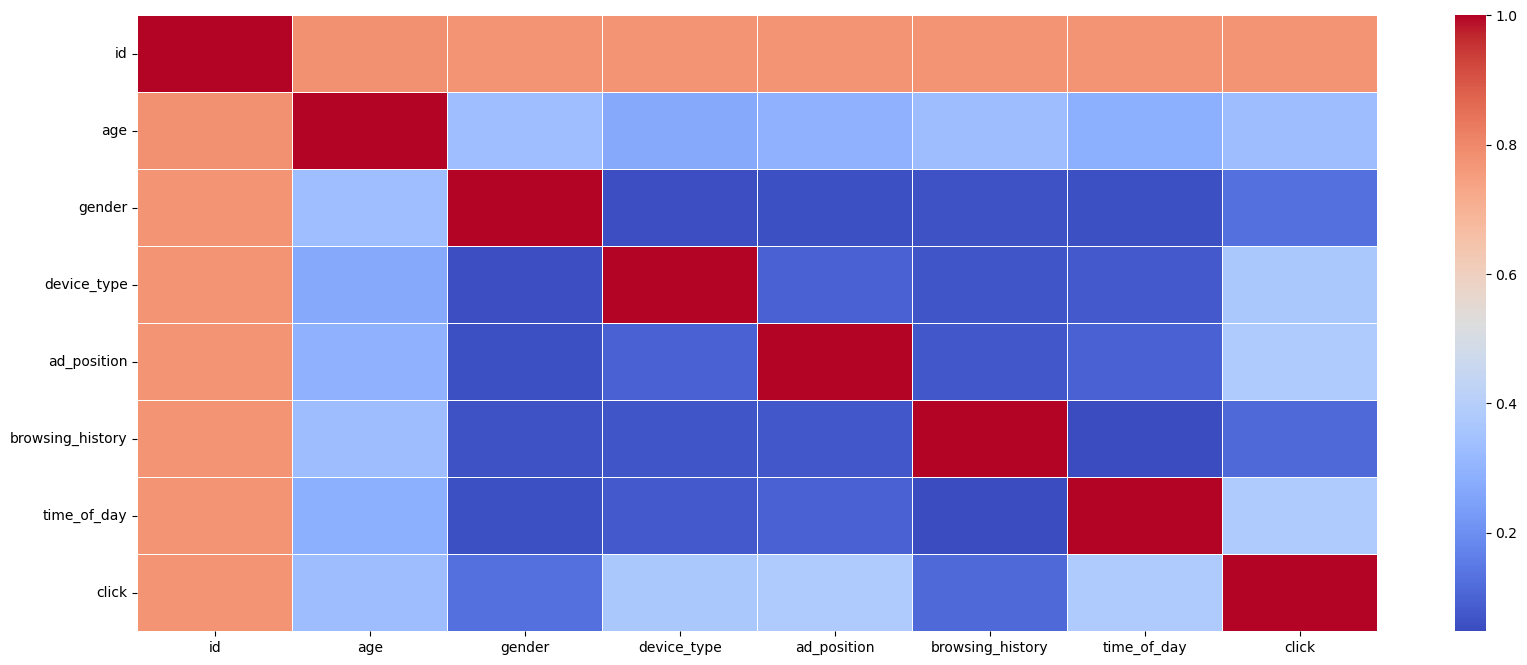

In [20]:
from dython.nominal import associations
associations_df = associations(df, nominal_columns='all', plot=False)

corr_matrix = associations_df['corr']

plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.show()

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

object_columns = df.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(
    transformers=[(f'{col}_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), [col]) for col in object_columns],
    remainder='passthrough'
)

In [22]:
from sklearn.preprocessing import LabelEncoder
enco=LabelEncoder()
df['gender']=enco.fit_transform(df['gender'])

In [23]:
x=df.drop(columns=['id','click'], axis=1)
y=df['click']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=3)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [26]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier

scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=94, use_label_encoder=False, eval_metric='logloss')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('adasyn', ADASYN(random_state=94)),
    ('classifier', model)
])

In [27]:
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

In [28]:
print(classification_report(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89       710
         1.0       0.91      0.99      0.95      1290

    accuracy                           0.93      2000
   macro avg       0.94      0.90      0.92      2000
weighted avg       0.93      0.93      0.92      2000


[[ 577  133]
 [  14 1276]]
